# Renewable Energy Production Forecasting System


### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Load Dataset

In [2]:
df = pd.read_csv('../data/SolarPrediction.csv')
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


### Feature Selection

In [3]:
features = ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']
target = 'Radiation'

X = df[features]
y = df[target]

### Handling Missing Data

In [4]:
# Check for missing values
print("Missing values in dataset:\n", df.isnull().sum())

# Drop rows with any missing values (or use df.fillna(...) to impute)
df = df.dropna()

Missing values in dataset:
 UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64


### Split the Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Train the Model

In [6]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

### Make Predictions

In [7]:
y_pred = model.predict(X_test)

### Evaluate Model

In [8]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 163.9443
R² Score: 0.7295


### Visualization - Actual vs Predicted

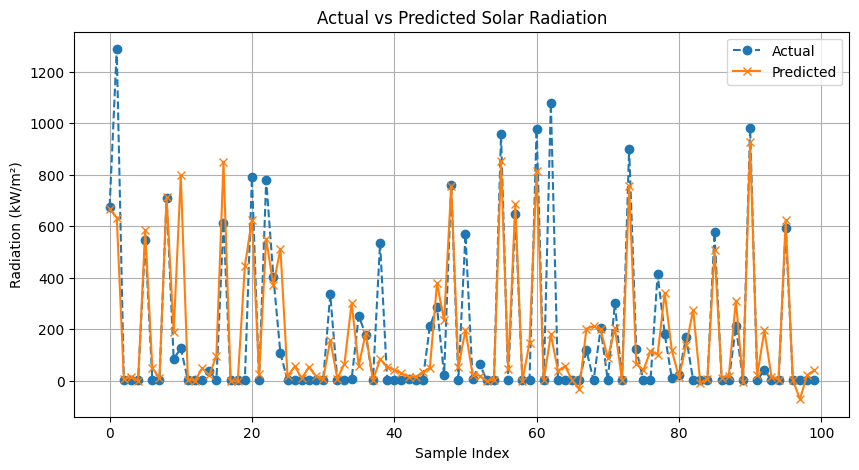

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o', linestyle='--')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Radiation (kW/m²)")
plt.title("Actual vs Predicted Solar Radiation")
plt.legend()
plt.grid(True)
plt.show()

### Make a New Prediction Example

In [10]:
sample_input = pd.DataFrame({
    'Temperature': [25.0],
    'Pressure': [1010.0],
    'Humidity': [50.0],
    'WindDirection(Degrees)': [180.0],
    'Speed': [2.0]
})

predicted_radiation = model.predict(sample_input)[0]
print(f"Predicted Radiation: {predicted_radiation:.2f} kW/m²")

Predicted Radiation: 36.31 kW/m²


Confusion Matrix:
[[   0    0]
 [ 461 6077]]
Accuracy: 0.93
Precision: 1.00
Recall: 0.93
F1 Score: 0.96


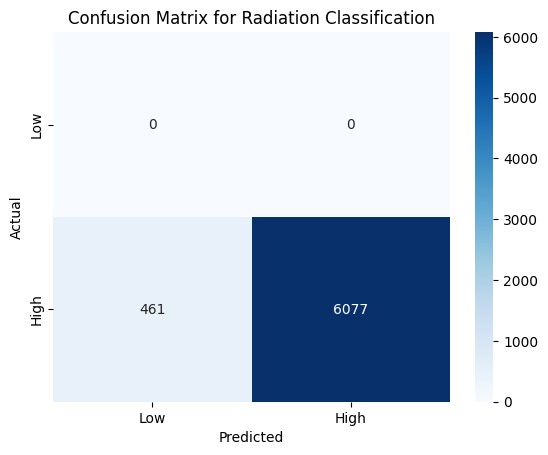

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the true and predicted values from test set into binary
y_test_binary = (y_test > 0.5).astype(int)
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute confusion matrix and classification metrics
cm = confusion_matrix(y_test_binary, y_pred_binary)
acc = accuracy_score(y_test_binary, y_pred_binary)
prec = precision_score(y_test_binary, y_pred_binary)
rec = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

# Print results
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Radiation Classification")
plt.show()
